<a href="https://colab.research.google.com/github/camulro/IA/blob/main/Copia_de_ML_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

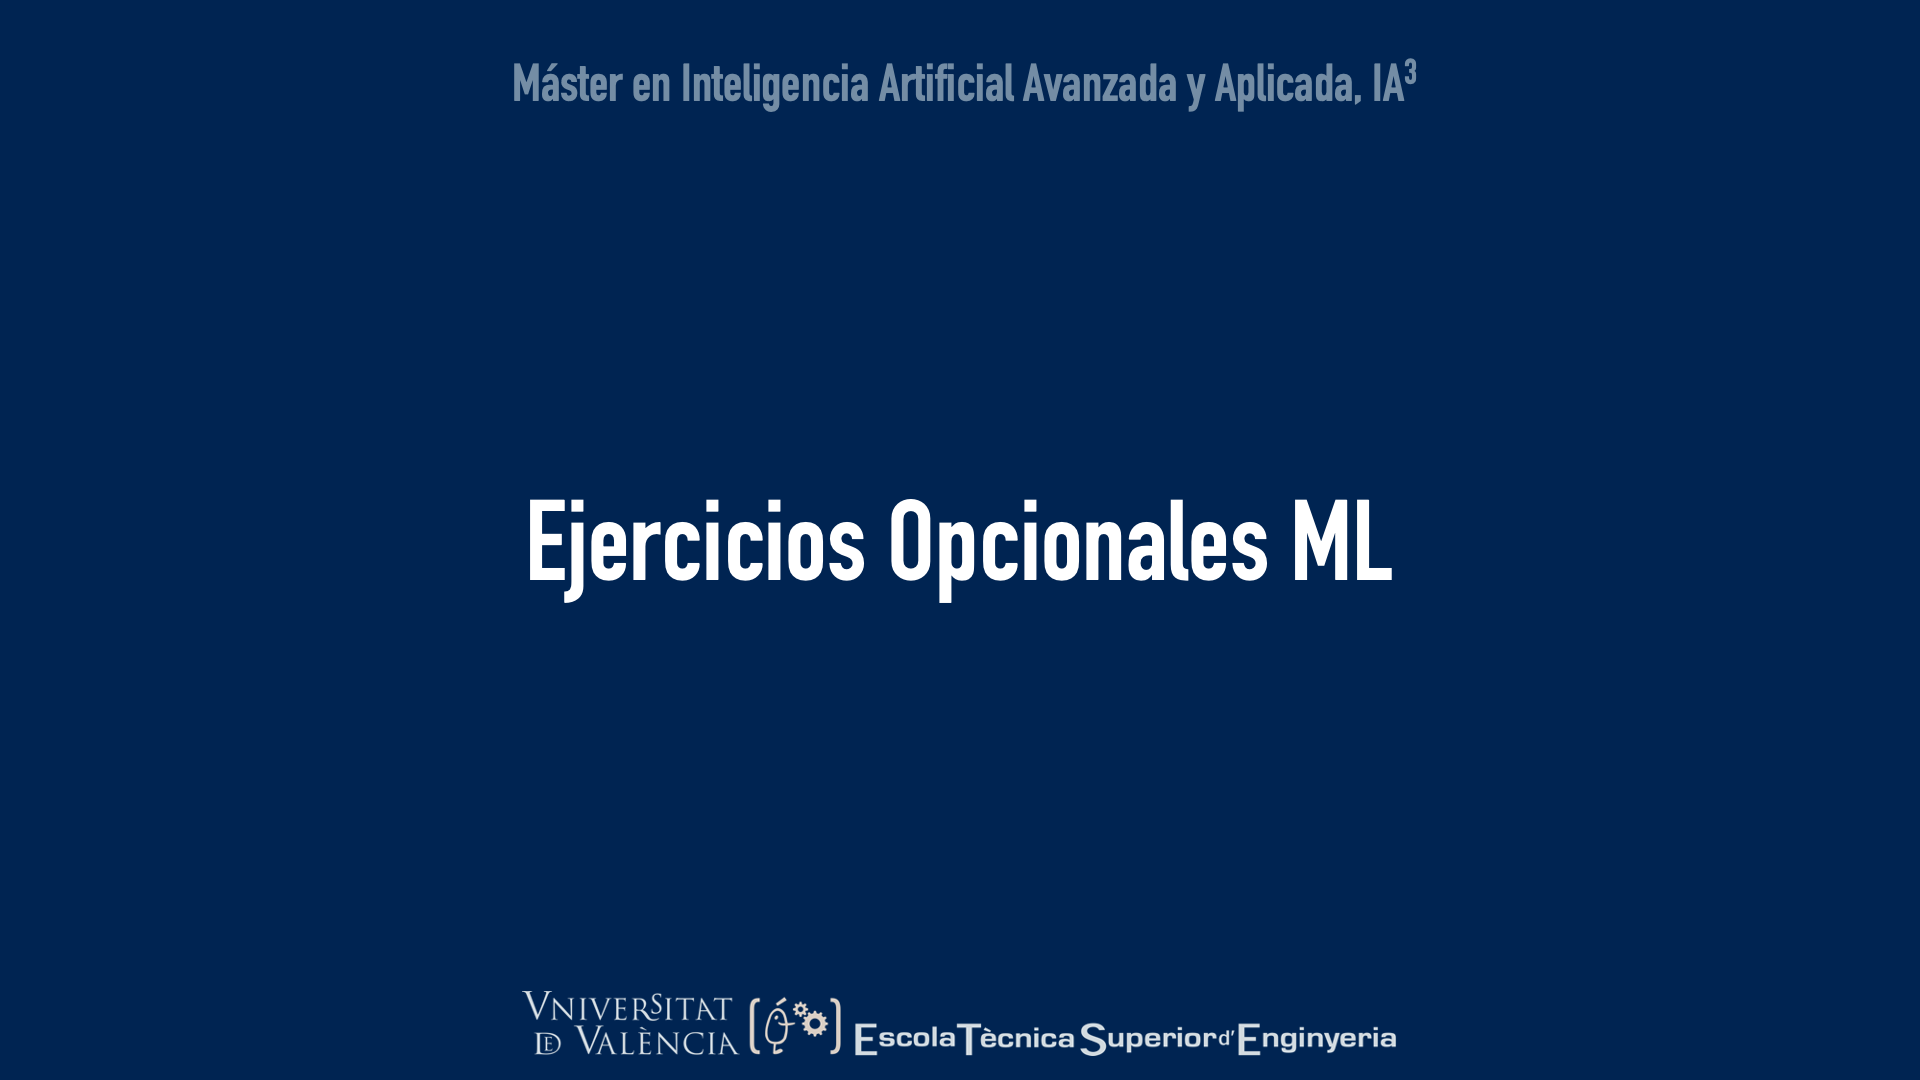

Hello again guys from IDAL IA3 Master Program. To continue with our experience in ML I am here to propose you two different exercises in order to keep progressing. As before, these two exercises are optional and will only increase your score on this mmodule, feel free to do one, both or none of them. The submission should follow the same rules as in the Batmobile exercise. Send me a link to your collaboratory notebook and keep the same groups as before.

# Exercise 01:

For this exercise I propose you to draw a flow diagram on how to learn on how to use an algorithm, train and evaluate it.

As we learnt in the class this process should contain a block on understanding how this algorithm learn, a block on how to train it including hyperparameters and one block on how you will evaluate and iterate to tune the hyperparameters.

The idea behind this exercise is that visualizing these ideas it will help you create your own framework to work in ML.

Just draw the diagram using diagram.io and upload it to the notebook.

# Exercise 02:

Now that you have your own framework to work using ML, I propose you to solve the same classification exercise of the pinguins dataset using one of the follow algorithms:

- Logistic Regressions - https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148#:~:text=Logistic%20Regression%20is%20a%20Machine,on%20the%20concept%20of%20probability.&text=The%20hypothesis%20of%20logistic%20regression,function%20between%200%20and%201%20.
- Naive Bayes - https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed#:~:text=Naive%20Bayes%20is%20a%20supervised,prediction%20on%20a%20target%20variable.
- Support Vector Machines (This one is specially difficult to understand and use) - https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.

Please choose one of the previous algorithms, do the classification exercise and include a small summary of how the algorithm performs against the decission tree and which hyperparameters you should to tune and why.

Let's solve with the Support Vector Machines' algorithm.

In [51]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from math import log

dataset = sns.load_dataset("penguins")
dataset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [2]:
dataset.dropna(inplace=True)

In [14]:
#quitamos las variables categóricas para buscar outliers
numeric_data = dataset.iloc[:, 2:-1]
numeric_data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [15]:
#buscamos outliers respecto de cada variable
describe_df = numeric_data.describe()
iqr = describe_df.loc["75%"] - describe_df.loc["25%"]

ub = describe_df.loc["75%"]+1.5*iqr
lb = describe_df.loc["25%"]-1.5*iqr

bool_index = numeric_data > ub
outliers = bool_index.sum(axis=1)
bool_index2 = outliers > 0
print(dataset.loc[bool_index2])

bool_index = numeric_data < lb
outliers = bool_index.sum(axis=1)
bool_index2 = outliers > 0
print(dataset.loc[bool_index2])
#observamos que no hay outliers desde el punto de vista de la distancia inercuartílica

Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


In [16]:
X = dataset.iloc[:, :-1] #features
y = dataset.iloc[:, -1:] #target

In [17]:
X = pd.get_dummies(X)

In [18]:
#normalizamos los datos porque hay variables en órdenes distintos
from sklearn.preprocessing import StandardScaler

std_scl = StandardScaler()
X = std_scl.fit_transform(X)
X = pd.DataFrame(X)
X.head(5)

,0,1,2,3,4,5,6,7,8,9
0,-0.896042,0.780732,-1.426752,-0.568475,1.131734,-0.506561,-0.745704,-0.979195,-0.76532,2.466801
1,-0.822788,0.119584,-1.069474,-0.506286,1.131734,-0.506561,-0.745704,-0.979195,-0.76532,2.466801
2,-0.676280,0.424729,-0.426373,-1.190361,1.131734,-0.506561,-0.745704,-0.979195,-0.76532,2.466801
3,-1.335566,1.085877,-0.569284,-0.941606,1.131734,-0.506561,-0.745704,-0.979195,-0.76532,2.466801
4,-0.859415,1.747026,-0.783651,-0.692852,1.131734,-0.506561,-0.745704,-0.979195,-0.76532,2.466801


In [19]:
from sklearn.svm import SVC

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [42]:
#probamos con distintos kernel
model = SVC(kernel='poly')
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9356223175965666
0.88


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [43]:
model = SVC(kernel='sigmoid')
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9227467811158798
0.89


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [44]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9313304721030042
0.88


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [46]:
model = SVC(kernel='linear',  C=1.0)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))#parece ser el que mejor funciona

0.9313304721030042
0.89


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [23]:
#probamos distintos valores de C
model = SVC(kernel='linear',  C=0.75)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9356223175965666
0.89


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [25]:
model = SVC(kernel='linear',  C=0.85)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9356223175965666
0.88


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [77]:
model = SVC(kernel='linear',  C=0.6)#es el que obtene una mejor precisión en el test y entrenamiento
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9356223175965666
0.91


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Ahora procederemos a comparar con un árbol de decisión.

In [82]:
model_tree = DecisionTreeClassifier(criterion="entropy")
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [83]:
print(model_tree.score(X_train, y_train))
print(model_tree.score(X_test, y_test))

1.0
0.89


Observamos que el árbol de decisión ajusta más a los datos de entrenamiento y con SVC obtenemos una precisión mejor en los datos de test y un mejor balance.

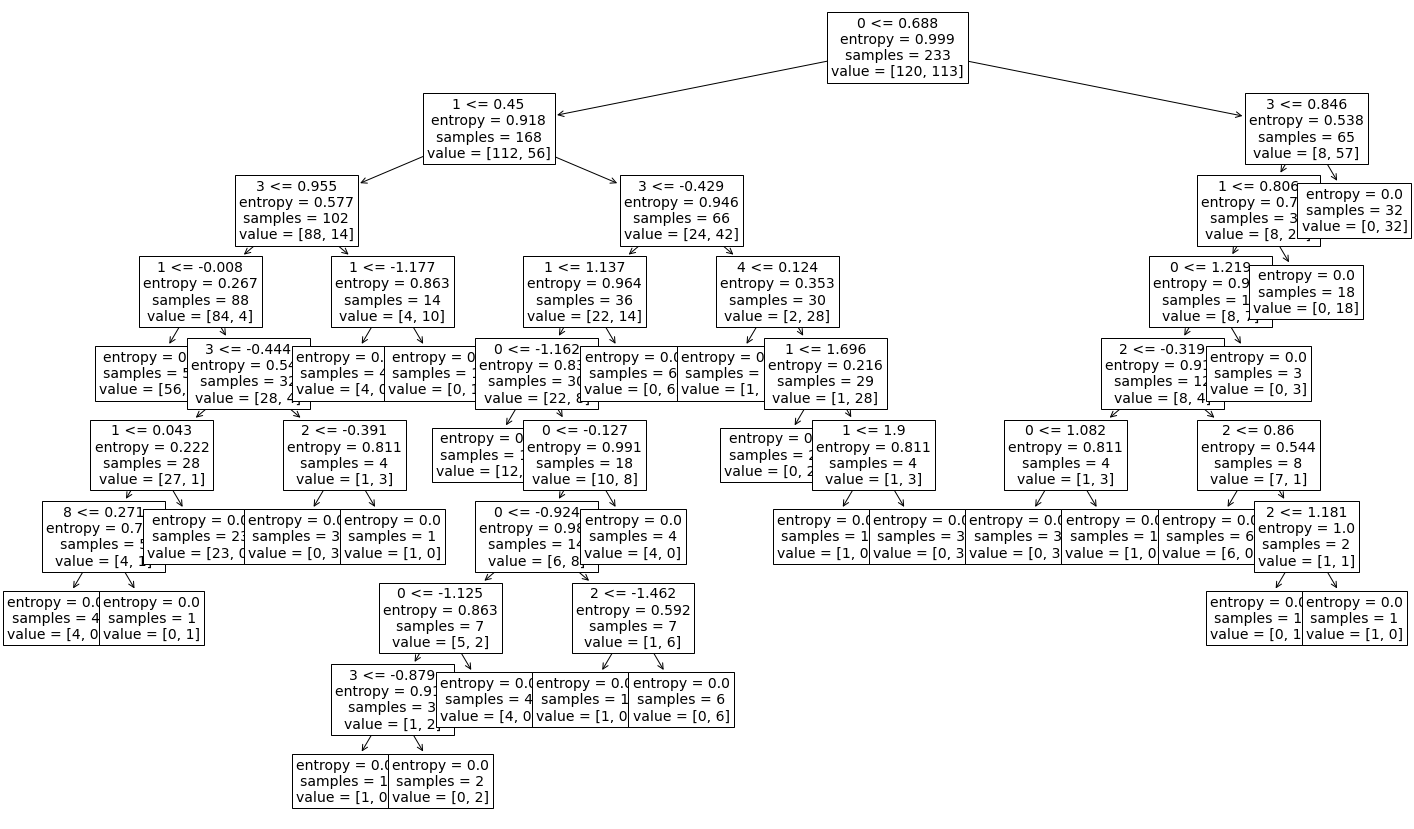

In [84]:
fig, ax = plt.subplots(figsize=(25, 15))
plot_tree(model_tree, feature_names=X.columns, fontsize=14)
plt.show()

In [85]:
y_train_bool = pd.get_dummies(y_train)["sex_Female"]
y_pred_train = model.predict(X_train)
y_pred_train_df = pd.DataFrame(y_pred_train)
y_pred_train_bool = pd.get_dummies(y_pred_train_df)["0_Male"]
y_test_bool = pd.get_dummies(y_test)["sex_Male"]
y_pred_test_bool = pd.get_dummies(pd.DataFrame(model.predict(X_test)))["0_Male"]

y_pred_train_tree = model_tree.predict(X_train)
y_pred_train_df_tree = pd.DataFrame(y_pred_train_tree)
y_pred_train_bool_tree = pd.get_dummies(y_pred_train_df_tree)["0_Male"]
y_pred_test_bool_tree = pd.get_dummies(pd.DataFrame(model_tree.predict(X_test)))["0_Male"]

In [86]:
print(f'SVC:{precision_score(y_test_bool,y_pred_test_bool)}') 
print(f'Decision Tree: {precision_score(y_test_bool,y_pred_test_bool_tree)}.')

SVC:0.9107142857142857
Decision Tree: 0.9230769230769231.


In [87]:
print(f"SVC: {precision_score(y_test,model.predict(X_test), average=None, labels=['Female','Male'])}")
print(f"Decision Tree: {precision_score(y_test,model_tree.predict(X_test), average=None, labels=['Female','Male'])}")

SVC: [0.90909091 0.91071429]
Decision Tree: [0.85416667 0.92307692]


In [88]:
print(f"SVC: {recall_score(y_test_bool, y_pred_test_bool)}")
print(f"Decision Tree: {recall_score(y_test_bool, y_pred_test_bool_tree)}")

SVC: 0.9272727272727272
Decision Tree: 0.8727272727272727


In [89]:
print(f"SVC: {recall_score(y_test,model.predict(X_test), average=None, labels=['Female','Male'])}")
print(f"SVC: {recall_score(y_test,model_tree.predict(X_test), average=None, labels=['Female','Male'])}")

SVC: [0.88888889 0.92727273]
SVC: [0.91111111 0.87272727]


In [90]:
print(f"SVC: {f1_score(y_test,model.predict(X_test), average=None, labels=['Female','Male'])}")
print(f"Decision Tree: {f1_score(y_test,model_tree.predict(X_test), average=None, labels=['Female','Male'])}")

SVC: [0.8988764  0.91891892]
Decision Tree: [0.88172043 0.89719626]
